In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import gzip
import shutil
import pathlib
import os
import sqlalchemy
import sqlite3
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()

%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
def convert_path(path):
    converted_path = pathlib.PureWindowsPath(path).as_posix()
    return converted_path

def print_files_in_directory(directory_path):
    with os.scandir(directory_path) as entries:
        for entry in entries:
            if entry.is_file():
                print(entry.name)
                
conn = sqlite3.connect('AirBnB_Data.db')
cursor = conn.cursor()

In [3]:
gz_calendar_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Calendars gz")
gz_listings_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Listings gz")
gz_reviews_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Reviews gz")

calendars_dest_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Calendars")
listings_dest_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Listings")
reviews_dest_path = convert_path("F:\Data Science\Datasets\AirBnB Data\Reviews")

In [4]:
# with os.scandir(gz_calendar_path) as entries:
#     for entry in entries:
#         if entry.is_file():
#             with gzip.open(f"{gz_calendar_path}/{entry.name}", 'rb') as gz_file, open(f"{calendars_dest_path}/{entry.name}", 'wb') as dest_file:
#                 shutil.copyfileobj(gz_file, dest_file)

In [5]:
# with os.scandir(gz_listings_path) as entries:
#     for entry in entries:
#         if entry.is_file():
#             with gzip.open(f"{gz_listings_path}/{entry.name}", 'rb') as gz_file, open(f"{listings_dest_path}/{entry.name}", 'wb') as dest_file:
#                 shutil.copyfileobj(gz_file, dest_file)

In [6]:
# with os.scandir(gz_reviews_path) as entries:
#     for entry in entries:
#         if entry.is_file():
#             with gzip.open(f"{gz_reviews_path}/{entry.name}", 'rb') as gz_file, open(f"{reviews_dest_path}/{entry.name}", 'wb') as dest_file:
#                 shutil.copyfileobj(gz_file, dest_file)

In [4]:
files_list = []

with os.scandir(gz_listings_path) as entries:
    for entry in entries:
        if entry.is_file():
            converted_path = convert_path(entry.path)
            data_df = pd.read_csv(converted_path)
            files_list.append(data_df)

df_listings = pd.concat(files_list)

In [5]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.91
1,39870,https://www.airbnb.com/rooms/39870,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.98,4.94,4.94,NaN,f,1,0,1,0,4.52
2,72906,https://www.airbnb.com/rooms/72906,20230622195211,2023-06-23,city scrape,Rental unit in Nashville · ★4.91 · 2 bedrooms ...,Entire top floor. Private. 800 sq ft of bright...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/58602855/3788...,176117,...,4.99,4.96,4.89,NaN,f,1,1,0,0,4.71
3,258817,https://www.airbnb.com/rooms/258817,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.77 · 1 bedroom · 2 beds...,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.90,4.74,4.73,NaN,f,8,0,7,1,0.68
4,289242,https://www.airbnb.com/rooms/289242,20230622195211,2023-06-22,city scrape,Home in Nashville · ★4.71 · 2 bedrooms · 3 bed...,Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,https://a0.muscache.com/pictures/40a7ab72-20f7...,22296,...,4.78,4.47,4.69,NaN,f,8,0,7,1,0.54


In [13]:
id_counts = df_listings['id'].nunique()
id_counts

228700

In [14]:
df_listings['id'].value_counts().sort_values(ascending=False)

1398981               2
632636                1
637425                1
72906                 1
258817                1
                     ..
906795574883203554    1
906805428220794999    1
906814914634646368    1
906822527155923710    1
906872151078347575    1
Name: id, Length: 228700, dtype: int64

<Axes: ylabel='Frequency'>

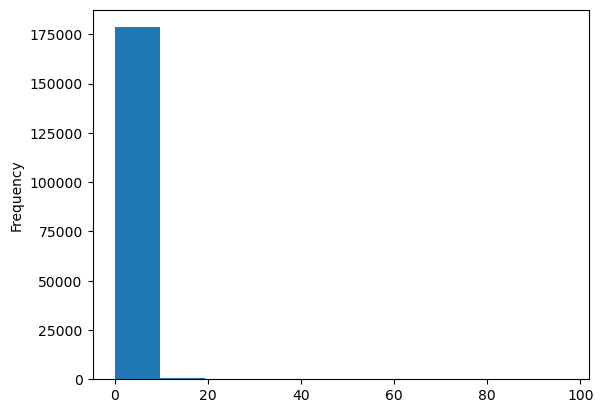

In [15]:
df_listings['reviews_per_month'].plot(kind='hist')

<Axes: ylabel='Frequency'>

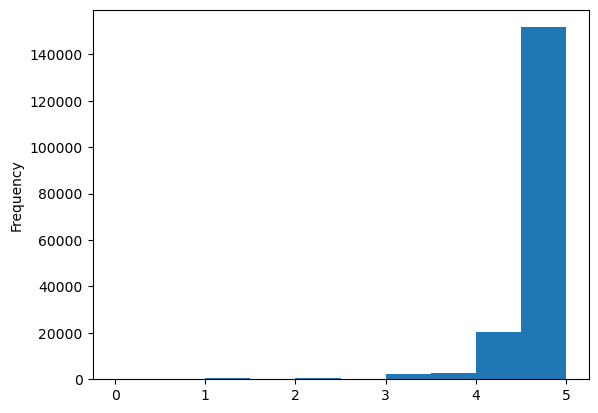

In [16]:
df_listings['review_scores_value'].plot(kind='hist')

In [5]:
create_table_sql = '''
CREATE TABLE IF NOT EXISTS listings ();
'''

In [13]:
#df_listings.to_sql(name='listings',con=conn)

228701

In [4]:
files_list = []

with os.scandir(gz_reviews_path) as entries:
    for entry in entries:
        if entry.is_file():
            converted_path = convert_path(entry.path)
            data_df = pd.read_csv(converted_path)
            files_list.append(data_df)

df_reviews = pd.concat(files_list)

In [5]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668045 entries, 0 to 1459404
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   listing_id     int64 
 1   id             int64 
 2   date           object
 3   reviewer_id    int64 
 4   reviewer_name  object
 5   comments       object
dtypes: int64(3), object(3)
memory usage: 516.3+ MB


In [21]:
sent_test = sid_obj.polarity_scores(df_reviews['comments'].iloc[:1])

In [22]:
sent_test

{'neg': 0.008, 'neu': 0.665, 'pos': 0.327, 'compound': 0.9942}

In [24]:
sent_test_list = []

for i in df_reviews['comments']:
    sents = sid_obj.polarity_scores(i)
    sent_test_list.append(sents)
    #print(sents)

In [26]:
sent_test_df = pd.DataFrame(sent_test_list)

In [27]:
sent_test_df

,neg,neu,pos,compound
0,0.008,0.665,0.327,0.9942
1,0.000,0.615,0.385,0.9953
2,0.000,0.671,0.329,0.9806
3,0.018,0.787,0.195,0.9680
4,0.039,0.695,0.266,0.9813
...,...,...,...,...
9668040,0.000,0.703,0.297,0.6697
9668041,0.020,0.722,0.257,0.9376
9668042,0.000,0.617,0.383,0.8264
9668043,0.000,0.732,0.268,0.9401


In [28]:
sent_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668045 entries, 0 to 9668044
Data columns (total 4 columns):
 #   Column    Dtype  
---  ------    -----  
 0   neg       float64
 1   neu       float64
 2   pos       float64
 3   compound  float64
dtypes: float64(4)
memory usage: 295.0 MB


In [27]:
df_reviews = pd.read_csv(r"C:\Users\asl4a\df_reviews.csv")
df_reviews['comments'] = df_reviews['comments'].astype(str)

In [30]:
df_reviews = df_reviews.rename(columns={'Unnamed: 0': 'temp_index'})

In [33]:
#df_reviews.to_sql(name='reviews', con=conn,if_exists='replace')

9668045

In [19]:
#df_reviews.to_csv('df_reviews.csv')

In [31]:
df_reviews.head()

,temp_index,listing_id,id,date,reviewer_id,reviewer_name,comments
0,0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [12]:
#sent_test_df.to_csv('sentiments.csv',index=True)

In [34]:
sent_test_df = pd.read_csv(r"C:\Users\asl4a\sentiments.csv")
sent_test_df = sent_test_df.rename(columns={'Unnamed: 0': 'temp_index'})

In [35]:
sent_test_df.head()

,temp_index,neg,neu,pos,compound
0,0,0.008,0.665,0.327,0.9942
1,1,0.000,0.615,0.385,0.9953
2,2,0.000,0.671,0.329,0.9806
3,3,0.018,0.787,0.195,0.9680
4,4,0.039,0.695,0.266,0.9813


In [36]:
sent_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668045 entries, 0 to 9668044
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   temp_index  int64  
 1   neg         float64
 2   neu         float64
 3   pos         float64
 4   compound    float64
dtypes: float64(4), int64(1)
memory usage: 368.8 MB


In [38]:
sent_test_df.to_sql(name='sentiments', con=conn, if_exists='replace')

9668045

In [42]:
# NOTE: I think this works because we join the sentiments onto the reviews table first and then in the same query we join the listings onto that combined dataset using the common id between listings and reviews
# The result looks correct but need to do further verification to be sure
combined_sentiments_df = pd.read_sql('''
SELECT *
FROM reviews
JOIN sentiments ON reviews.temp_index = sentiments.temp_index
JOIN listings ON reviews.id = listings.id
LIMIT 100;
''',con=conn)


In [40]:
# test_1 = pd.read_sql('''
# SELECT *
# FROM reviews;
# ''',con=conn)

In [23]:
#conn.commit()

In [24]:
#conn.close()

In [41]:
combined_sentiments_df.head()

,index,temp_index,listing_id,id,date,reviewer_id,reviewer_name,comments,index,temp_index,neg,neu,pos,compound
0,0,0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...,0,0,0.008,0.665,0.327,0.9942
1,1,1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...,1,1,0.000,0.615,0.385,0.9953
2,2,2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...,2,2,0.000,0.671,0.329,0.9806
3,3,3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...,3,3,0.018,0.787,0.195,0.9680
4,4,4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...,4,4,0.039,0.695,0.266,0.9813


In [43]:
combined_sentiments_df.head()

,index,temp_index,listing_id,id,date,reviewer_id,reviewer_name,comments,index,temp_index,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,637,637,914787,4357892,2013-04-30,4921711,Drew,This is a fantastic place to stay if you are l...,637,637,...,4.91,4.77,4.80,None,f,1,1,0,0,1.02
1,927,927,914787,30858845,2015-04-28,26420600,Linda,"Walking distance from Bicentennial Mall, the F...",927,927,...,4.96,4.91,4.94,None,t,2,2,0,0,4.44
2,3868,3868,4438136,30387983,2015-04-21,14785492,Charles,The house is in a very pretty historical neigh...,3868,3868,...,NaN,NaN,NaN,None,f,569,569,0,0,NaN
3,5000,5000,4485271,51714935,2015-10-24,40995935,Catherine,We had an absolutely wonderful time at Tim's c...,5000,5000,...,5.00,5.00,5.00,Exempt - This listing is a bed and breakfast,f,14,14,0,0,0.05
4,5359,5359,4491931,50063053,2015-10-09,33299521,Stacy,Great location & a wonderful house to stay in.,5359,5359,...,NaN,NaN,NaN,None,f,32,32,0,0,NaN


In [44]:
combined_sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 90 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         100 non-null    int64  
 1   temp_index                                    100 non-null    int64  
 2   listing_id                                    100 non-null    int64  
 3   id                                            100 non-null    int64  
 4   date                                          100 non-null    object 
 5   reviewer_id                                   100 non-null    int64  
 6   reviewer_name                                 100 non-null    object 
 7   comments                                      100 non-null    object 
 8   index                                         100 non-null    int64  
 9   temp_index                                    100 non-null    int6